In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [61]:
df_features = pd.read_csv('training_set_features.csv')
df_test_features = pd.read_csv('test_set_features.csv')
respondent_id = df_test_features.respondent_id.values
df_labels = pd.read_csv('training_set_labels.csv')
df_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [62]:
df_features.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [63]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

<Axes: >

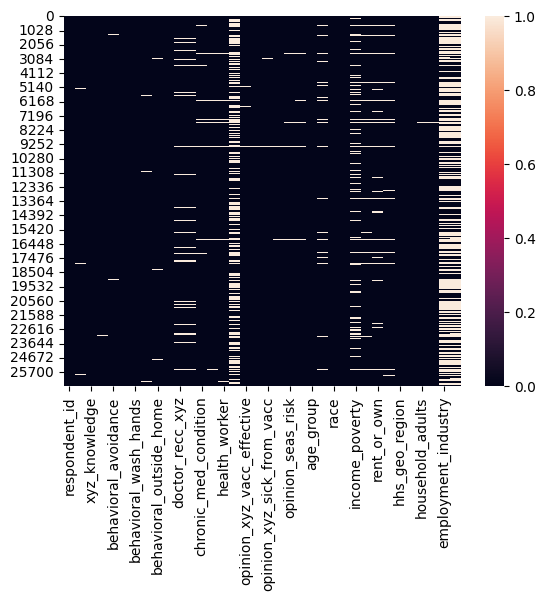

In [64]:
sns.heatmap(df_features.isnull())

<Axes: xlabel='income_poverty', ylabel='count'>

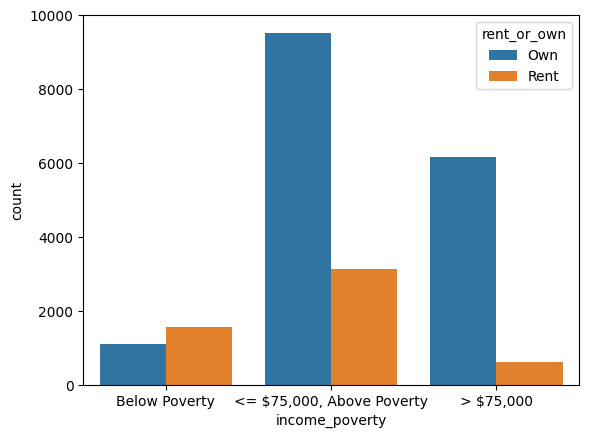

In [65]:
sns.countplot(hue='rent_or_own', x='income_poverty', data=df_features)

<Axes: xlabel='education'>

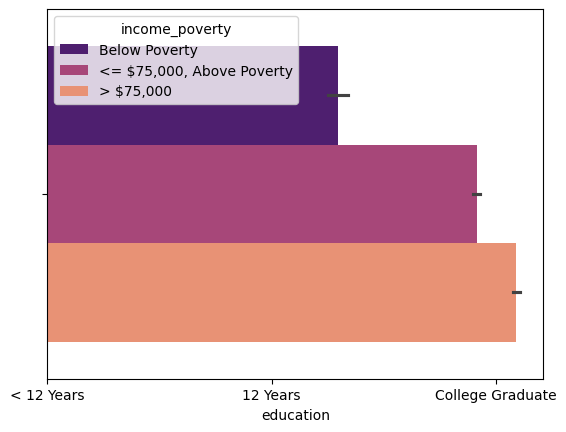

In [66]:
sns.barplot(x='education', hue='income_poverty', data=df_features, palette='magma')

<Axes: xlabel='age_group', ylabel='count'>

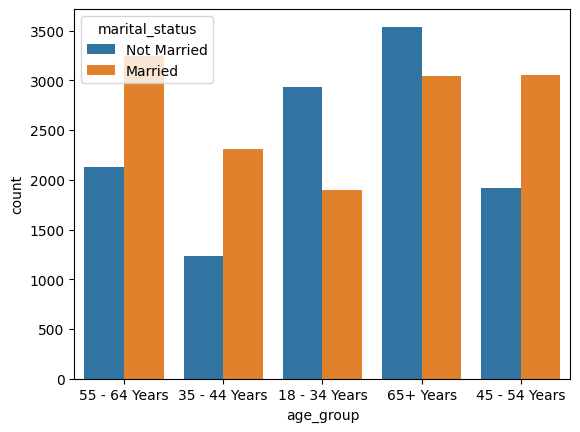

In [67]:
sns.countplot(x='age_group', hue='marital_status', data=df_features)

In [68]:
df_features.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [69]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def fill_missing_values(df):
    # Fill missing values in 'census_msa' and 'employment_status'
    df['census_msa'].fillna('null', inplace=True)
    df['employment_status'].fillna('unemployed', inplace=True)

    # Fill missing values in 'income_poverty' with mode
    mode_income = df['income_poverty'].mode()[0]
    df['income_poverty'].fillna(mode_income, inplace=True)

    # Fill missing values in 'rent_or_own' based on 'income_poverty'
    df['rent_or_own'].fillna(df['income_poverty'].apply(
        lambda x: 'Own' if x in ['<= $75,000, Above Poverty', '> $75,000'] else 'Rent'
    ), inplace=True)

    # Fill missing values in 'marital_status' based on 'age_group'
    df['marital_status'].fillna(df['age_group'].apply(
        lambda x: 'Married' if x in ['65+ Years', '18 - 34 Years'] else 'Not Married'
    ), inplace=True)

    # Fill missing values in 'education' based on 'income_poverty'
    df['education'].fillna(df['income_poverty'].apply(
        lambda x: 'College Graduate' if x in ['<= $75,000, Above Poverty', '> $75,000'] else '12 Years'
    ), inplace=True)

    # Fill missing values in specified columns with mode
    mode_columns = [
        'xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
        'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
        'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
        'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_xyz_vacc_effective',
        'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
        'opinion_seas_risk', 'opinion_seas_sick_from_vacc'
    ]
    df[mode_columns] = df[mode_columns].fillna(df.mode().iloc[0])

    # Fill missing values with 0 for household columns
    df[['household_adults', 'household_children']] = df[['household_adults', 'household_children']].fillna(0)

    return df

def drop_unnecessary_columns(df):
    # Drop unnecessary columns from the dataframe
    columns_to_drop = ['employment_industry', 'employment_occupation', 'hhs_geo_region', 'health_insurance']
    df.drop(columns=columns_to_drop, axis=1, inplace=True)
    return df

def preprocess_features(df):
    df = df.copy()
    df = drop_unnecessary_columns(df)
    df = fill_missing_values(df)

    # Separate categorical and numeric columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    numeric_cols = df.select_dtypes(exclude=['object']).columns

    # Encode categorical columns
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

    # Concatenate encoded categorical columns with numeric columns
    preprocessed_df = pd.concat([encoded_df, df[numeric_cols]], axis=1)

    return preprocessed_df


In [70]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [71]:
df_features = preprocess_features(df_features)
df_test_features = preprocess_features(df_test_features)

/home/ash_9476/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ash_9476/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [72]:
df_features.columns

Index(['age_group_18 - 34 Years', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_12 Years', 'education_< 12 Years',
       'education_College Graduate', 'education_Some College', 'race_Black',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Female',
       'sex_Male', 'income_poverty_<= $75,000, Above Poverty',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'marital_status_Married', 'marital_status_Not Married',
       'rent_or_own_Own', 'rent_or_own_Rent', 'employment_status_Employed',
       'employment_status_Not in Labor Force', 'employment_status_Unemployed',
       'employment_status_unemployed', 'census_msa_MSA, Not Principle  City',
       'census_msa_MSA, Principle City', 'census_msa_Non-MSA', 'respondent_id',
       'xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_h

In [73]:
df_features.head()

,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,...,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0


In [74]:
y_train_xyz = df_labels['xyz_vaccine']
y_train_seasonal = df_labels['seasonal_vaccine']

In [75]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
model_xyz = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(df_features.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_xyz.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Training xyz_vaccine model
model_xyz.fit(
    df_features, y_train_xyz, 
    validation_data=(df_features, y_train_xyz),
    epochs=100, 
    batch_size=32, 
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)
accuracy_score_xyz = model_xyz.evaluate(df_features, y_train_xyz)


Epoch 1/100
835/835 [==============================] - 2s 2ms/step - loss: 0.5828 - accuracy: 0.7425 - val_loss: 0.5195 - val_accuracy: 0.7876
Epoch 2/100
835/835 [==============================] - 2s 2ms/step - loss: 0.5341 - accuracy: 0.7841 - val_loss: 0.5194 - val_accuracy: 0.7875
Epoch 3/100
835/835 [==============================] - 2s 2ms/step - loss: 0.5254 - accuracy: 0.7871 - val_loss: 0.5177 - val_accuracy: 0.7873
Epoch 4/100
835/835 [==============================] - 2s 2ms/step - loss: 0.5222 - accuracy: 0.7874 - val_loss: 0.5171 - val_accuracy: 0.7876
Epoch 5/100
835/835 [==============================] - 2s 2ms/step - loss: 0.5210 - accuracy: 0.7875 - val_loss: 0.5212 - val_accuracy: 0.7874
Epoch 6/100
835/835 [==============================] - 2s 2ms/step - loss: 0.5199 - accuracy: 0.7875 - val_loss: 0.5166 - val_accuracy: 0.7874
Epoch 7/100
835/835 [==============================] - 2s 2ms/step - loss: 0.5194 - accuracy: 0.7875 - val_loss: 0.5216 - val_accuracy: 0.7876

In [77]:
model_seasonal = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(df_features.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_seasonal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Training xyz_vaccine model
model_seasonal.fit(
    df_features, y_train_seasonal, 
    validation_data=(df_features, y_train_seasonal),
    epochs=100, 
    batch_size=32, 
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

accuracy_score_seasonal = model_seasonal.evaluate(df_features, y_train_seasonal)


Epoch 1/100
835/835 [==============================] - 2s 2ms/step - loss: 0.7533 - accuracy: 0.5037 - val_loss: 0.6978 - val_accuracy: 0.5087
Epoch 2/100
835/835 [==============================] - 2s 2ms/step - loss: 0.7015 - accuracy: 0.5246 - val_loss: 0.7127 - val_accuracy: 0.4910
Epoch 3/100
835/835 [==============================] - 2s 2ms/step - loss: 0.6937 - accuracy: 0.5291 - val_loss: 0.6921 - val_accuracy: 0.5041
Epoch 4/100
835/835 [==============================] - 2s 2ms/step - loss: 0.6913 - accuracy: 0.5322 - val_loss: 0.6899 - val_accuracy: 0.5047
Epoch 5/100
835/835 [==============================] - 2s 2ms/step - loss: 0.6865 - accuracy: 0.5545 - val_loss: 0.7015 - val_accuracy: 0.5354
Epoch 6/100
835/835 [==============================] - 2s 2ms/step - loss: 0.6467 - accuracy: 0.6117 - val_loss: 0.6583 - val_accuracy: 0.5955
Epoch 7/100
835/835 [==============================] - 2s 2ms/step - loss: 0.5951 - accuracy: 0.6705 - val_loss: 0.6927 - val_accuracy: 0.6089

In [78]:
xyz_predictions = model_xyz.predict(df_test_features)
seasonal_predictions = model_seasonal.predict(df_test_features)

835/835 [==============================] - 1s 684us/step


In [79]:

# Ensure all inputs are numpy arrays
respondent_id = np.array(respondent_id).flatten()
xyz_predictions = np.array(xyz_predictions).flatten()
seasonal_predictions = np.array(seasonal_predictions).flatten()

# Create the DataFrame
predictions_df = pd.DataFrame({
    'respondent_id': respondent_id,
    'h1n1_vaccine': xyz_predictions,
    'seasonal_vaccine': seasonal_predictions
})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)
xyz_predictions

array([0.14674893, 0.10750379, 0.3640371 , ..., 0.20866707, 0.16700391,
       0.28255215], dtype=float32)

In [80]:
predictions_df = pd.DataFrame({
    'respondent_id' : respondent_id,
    'h1n1_vaccine' : np.array(xyz_predictions),
    'seasonal_vaccine' : np.array(seasonal_predictions)
})
predictions_df.to_csv('submissionfinal.csv', index=False)